In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import BoxStyle

from IPython.display import clear_output

import ccdproc
# from astrowidgets import ImageWidget

from photutils.aperture import SkyCircularAperture, SkyCircularAnnulus

import astropy
from astropy.nddata import CCDData
from astropy import log
from astropy import units as u
from astropy.coordinates import SkyCoord, ICRS
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize

FITS_DIR = "/run/media/ramon/ROG_Data/Tesis/IturbideDatos/Ensenada Corrections/ATOJ339.9469+45.1464/fixed-solved-fits/"
CCD_KWARGS = {'unit': 'adu'}

OBJ_COORD = SkyCoord(339.94692562872, 45.14639621713, unit=u.deg, frame=ICRS)

# Coordinates obtained from SIMBAD Gaia DR3 measurements
	# Except for 2MASS object, coord.s taken from 2MASS observations
# TODO: use 332 as main reference star
	# had least amount of OOB errors when looking through all the images
	# maybe don't use images where reference star is OOB? would only amount to removing ~5 images total
REF_OBJS_COORDS = {	
	"TYC 3620-332-1": SkyCoord(339.88604238078, 45.12830357108, unit=u.deg, frame=ICRS), # http://simbad.cds.unistra.fr/simbad/sim-id?Ident=%406898038&Name=TYC%203620-332-1
	"TYC 3620-254-1": SkyCoord(339.99378670432, 45.10213449513, unit=u.deg, frame=ICRS), # http://simbad.cds.unistra.fr/simbad/sim-id?Ident=%406898031&Name=TYC%203620-254-1
    "2MASS J22395194+4511599": SkyCoord(339.966424, 45.199989, unit=u.deg, frame=ICRS) # http://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4021392858&Name=2MASS%20J22395194%2b4511599
}

In [2]:
objectFiles = ccdproc.ImageFileCollection(FITS_DIR)

/tmp/ipykernel_60301/650441081.py:7: RuntimeWarning: invalid value encountered in sqrt
  ccd.uncertainty = np.sqrt(readNoise**2 + gain*ccd.data) / gain # taken from astropy workshop tutorial on working_with_images
INFO:astropy:array provided for uncertainty; assuming it is a StdDevUncertainty.


INFO: array provided for uncertainty; assuming it is a StdDevUncertainty. [astropy.nddata.ccddata]


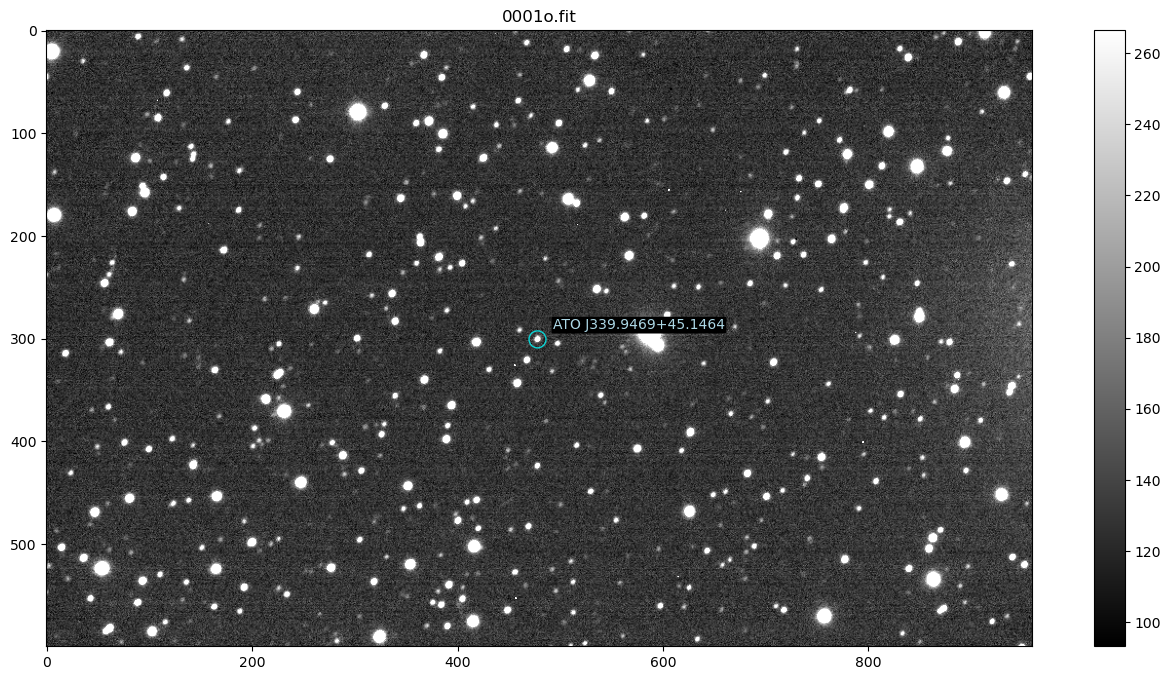

In [4]:
# TODO: use data in ROG SSD to get centroids of reference objects from Raul Michel analysis

interval = AsymmetricPercentileInterval(0.2, 98.5)

for ccd, fname in objectFiles.ccds(ccd_kwargs=CCD_KWARGS, return_fname=True):
	readNoise = float(ccd.header['RDNOISE'])
	gain = float(ccd.header['GAIN'])
	wcs = ccd.wcs
	ccd.uncertainty = np.sqrt(readNoise**2 + gain*ccd.data) / gain # taken from astropy workshop tutorial on working_with_images

	objAperture = SkyCircularAperture(OBJ_COORD, r=0.1*u.arcsec)

	matplotlib_norm = ImageNormalize(ccd.data, interval=interval)
	plt.figure(figsize=(16, 8))
	plt.imshow(ccd.data, cmap='gray', norm=matplotlib_norm)
	# objAperture.to_pixel(wcs).plot(color='cyan', lw=12, ls='-', hatch='.')
 
	pixelAperture = objAperture.to_pixel(wcs)
	plt.colorbar()

	plt.scatter(pixelAperture.positions[0], pixelAperture.positions[1], marker='.', alpha=0.8, edgecolors='cyan', facecolors='none', s=600)
	plt.text(pixelAperture.positions[0] + 15, pixelAperture.positions[1] - 10, "ATO J339.9469+45.1464", color='lightblue', 
				bbox=dict(boxstyle=BoxStyle("Round", pad=0.1), fc='black', ec='none'), fontsize=10)

	plt.title(fname)
	plt.show()
	
	if input() == 'q':
		break
	plt.clf()
	clear_output()